# 1. EDA 

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

# Set some aesthetic settings
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (4,3)

## Defining  Plotting Style

In [2]:
def plot_count_normalized(column_name):
    normalized_counts = application_data[column_name].value_counts(normalize=True)
    ax = sns.barplot(x = normalized_counts.index, y = normalized_counts.values)

def plot_count_two_column_normalized(col1, col2):
    count_data = application_data.groupby([col1, col2]).size().reset_index(name='Count')
    total_data = application_data.groupby(col1).size().reset_index(name='Total')
    count_data = count_data.merge(total_data, on=col1)
    count_data['Ratio'] = count_data['Count'] / count_data['Total']

    ax = sns.barplot(data=count_data, x=col1, y='Ratio', hue=col2, errorbar=None)

    # Annotate each bar with the percentage value
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline', fontsize=8, color='black')

    plt.show()

def pie_plot_column(column_name,x=5,y=4):
    Gender_df = pd.DataFrame(application_data[column_name].value_counts())
    ax = Gender_df.plot.pie(y = 'count', figsize=(x,y) , autopct='%1.1f%%')

def pie_count_categorical(column_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(8,4))
    normalized_counts = application_data[column_name].value_counts(normalize=True)
    ax = sns.barplot(x = normalized_counts.index, y = normalized_counts.values, ax = ax1)
    Gender_df = pd.DataFrame(application_data[column_name].value_counts())
    ax2.pie(Gender_df['count'], labels=Gender_df.index,autopct='%1.1f%%')
    ax2.set_aspect('equal')

In [3]:
# Helper to load dataset from different sources
def load_data():
    if os.path.exists("./dataset/application_data.csv") and os.path.exists("./dataset/previous_application.csv"):
        app_data = pd.read_csv("./dataset/application_data.csv")
        prev_data = pd.read_csv("./dataset/previous_application.csv")
        return app_data, prev_data
    else:
        raise FileNotFoundError("Please ensure both 'dataset/application_data.csv' and 'dataset/previous_application.csv' are in the current working directory.")

# Load the data
application_data, previous_application = load_data()

In [4]:
print(application_data.shape)
print(application_data.columns.tolist()[:])  # Preview first 10 column names
application_data.head()

(307511, 122)
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONA

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_data.isnull().sum().sort_values(ascending=False)  # Null check

COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
FLAG_DOCUMENT_16                 0
FLAG_DOCUMENT_15                 0
FLAG_DOCUMENT_14                 0
FLAG_DOCUMENT_20                 0
FLAG_DOCUMENT_21                 0
Length: 122, dtype: int64

In [6]:
application_data.duplicated().sum() #Duplicate values

np.int64(0)

In [7]:
#target var count
application_data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [8]:
application_data['TARGET'].value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

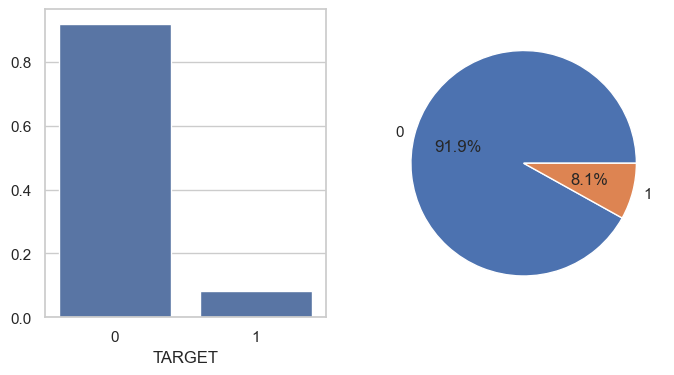

In [9]:
pie_count_categorical('TARGET')

In [10]:
application_data['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

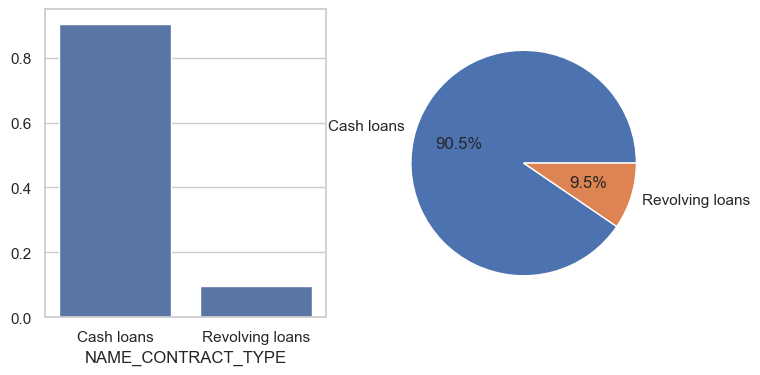

In [11]:
pie_count_categorical('NAME_CONTRACT_TYPE')

In [12]:
application_data['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [13]:
application_data = application_data[application_data['CODE_GENDER']!='XNA']

In [14]:
application_data['CODE_GENDER'].value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

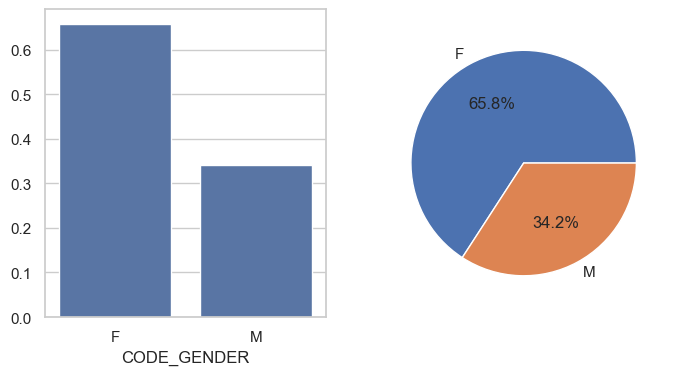

In [15]:
pie_count_categorical('CODE_GENDER')

In [16]:
application_data['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

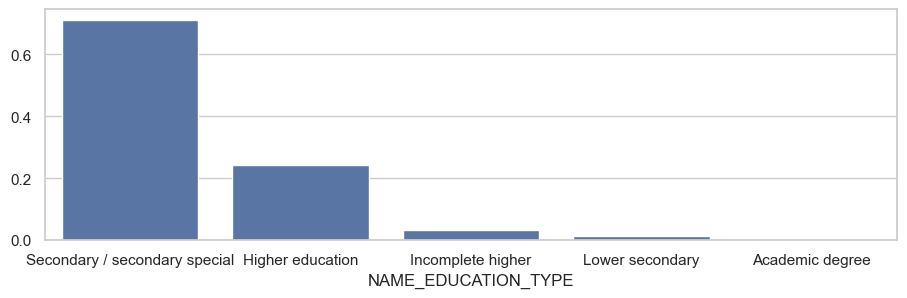

In [17]:
# education
plt.figure(figsize=(11,3))
plot_count_normalized('NAME_EDUCATION_TYPE')

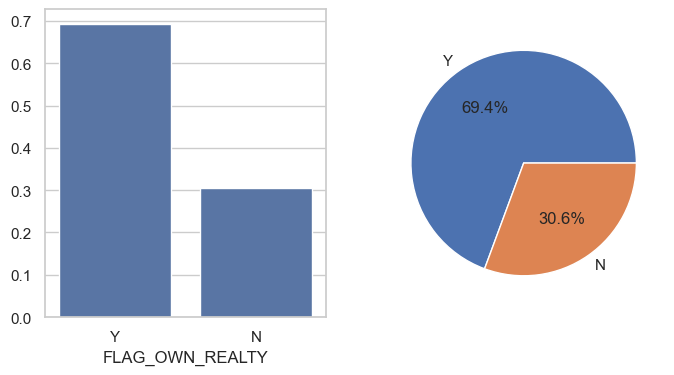

In [18]:
# Flag if client owns a house or flat
pie_count_categorical('FLAG_OWN_REALTY')

In [19]:
# housing situation of the client
application_data['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272865
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

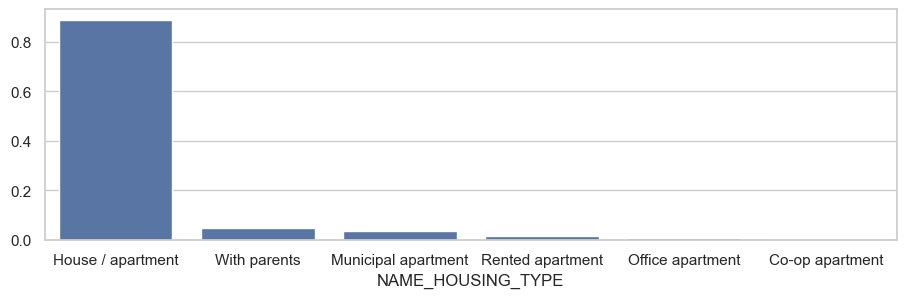

In [20]:
plt.figure(figsize=(11,3))
plot_count_normalized('NAME_HOUSING_TYPE')

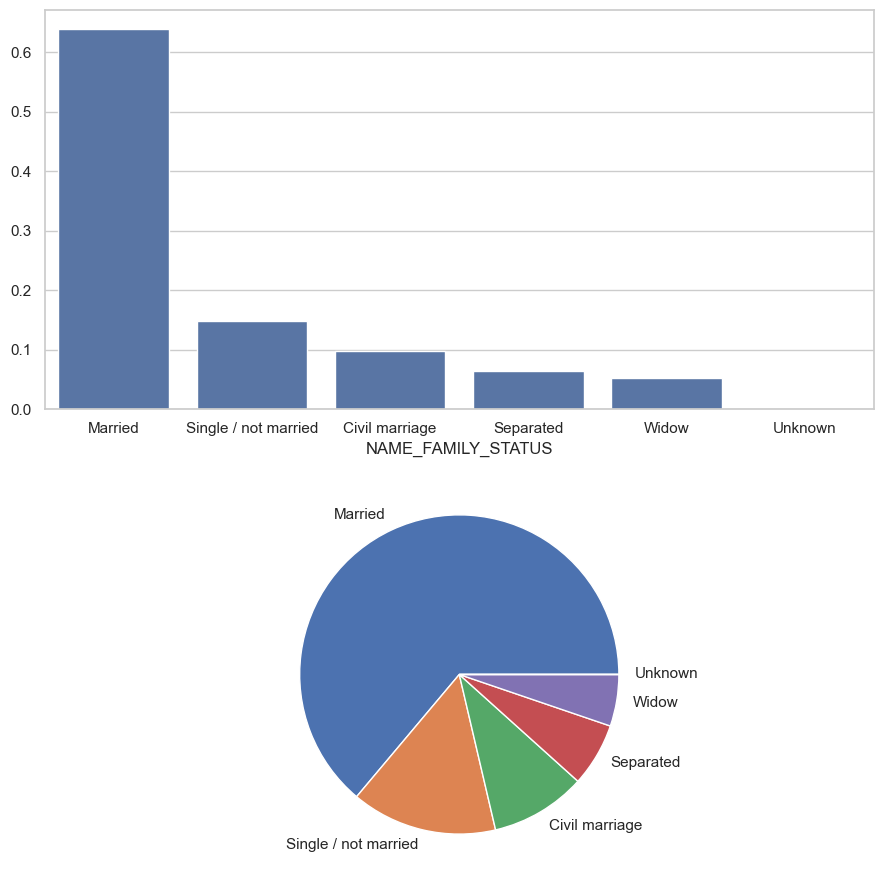

In [21]:
# Family status of the client
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(9,9))
normalized_counts = application_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)
ax = sns.barplot(x = normalized_counts.index, y = normalized_counts.values, ax = ax1)
Gender_df = pd.DataFrame(application_data['NAME_FAMILY_STATUS'].value_counts())
ax2.pie(Gender_df['count'], labels=Gender_df.index)
ax2.set_aspect('equal')
plt.tight_layout()

In [22]:
# How many family members does client have
application_data['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158355
1.0      67847
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

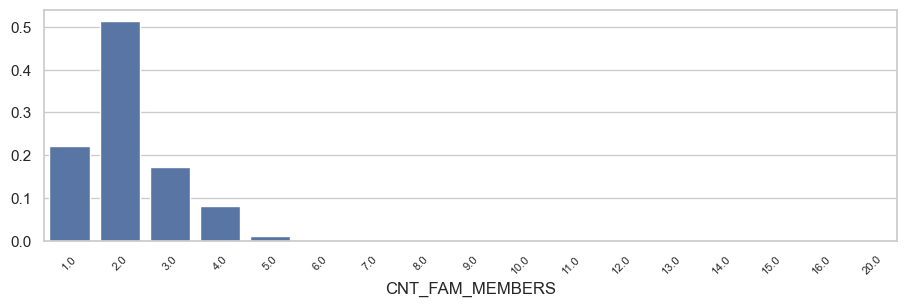

In [23]:
plt.figure(figsize=(11,3))
plot_count_normalized('CNT_FAM_MEMBERS')
_ = plt.xticks(fontsize = 8, rotation=45)

Since the number of clients with family members is small, we will combine them into one category "More than 4".

In [24]:
# put family memebers into different categories
application_data['CNT_FAM_MEMBERS_MAPPED'] = application_data['CNT_FAM_MEMBERS'].apply(lambda x: "More than 4" if x > 4 else x)

In [25]:
application_data['CNT_FAM_MEMBERS_MAPPED'].value_counts()

CNT_FAM_MEMBERS_MAPPED
2.0            158355
1.0             67847
3.0             52600
4.0             24696
More than 4      4007
Name: count, dtype: int64

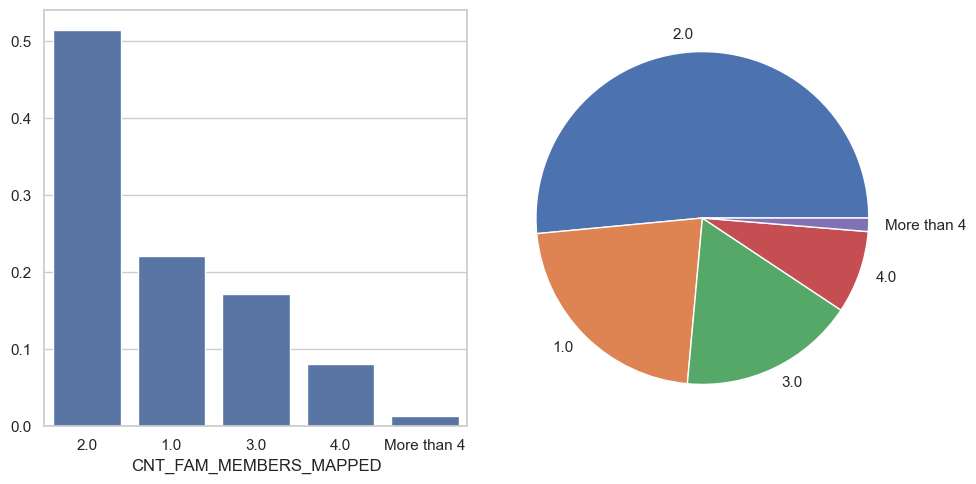

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(10,5))
normalized_counts = application_data['CNT_FAM_MEMBERS_MAPPED'].value_counts(normalize=True)
ax = sns.barplot(x = normalized_counts.index, y = normalized_counts.values, ax = ax1)
Gender_df = pd.DataFrame(application_data['CNT_FAM_MEMBERS_MAPPED'].value_counts())
ax2.pie(Gender_df['count'], labels=Gender_df.index)
ax2.set_aspect('equal')
plt.tight_layout()

About 51% of the clients have 2 family memebers, 26% have 1 family memeber.

What is the distribution of clients based on property, car and related features?

In [27]:
# Our rating of the region where client lives
application_data['REGION_RATING_CLIENT'].value_counts()

REGION_RATING_CLIENT
2    226981
3     48329
1     32197
Name: count, dtype: int64

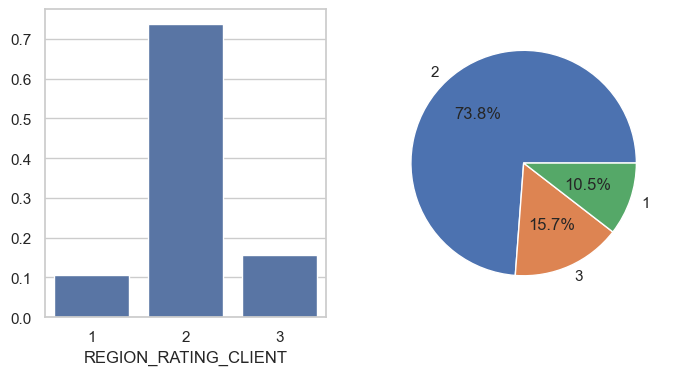

In [28]:
pie_count_categorical('REGION_RATING_CLIENT')

About 74% of the clients come from regions that are rated 2 according to the bank rating, (moderate)

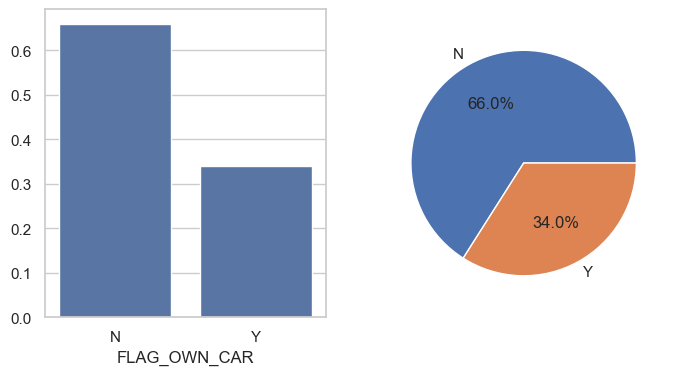

In [29]:
# Flag if the client owns a car
pie_count_categorical('FLAG_OWN_CAR')

63% of loan takers don't have a car.

In [30]:
application_data['DAYS_BIRTH'].describe()

count    307507.000000
mean     -16037.027271
std        4363.982424
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

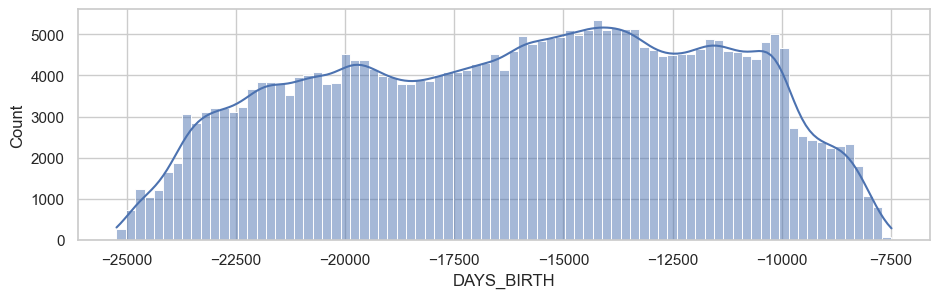

In [31]:
plt.figure(figsize=(11,3))
ax = sns.histplot(application_data , x = 'DAYS_BIRTH', kde=True)

In [32]:
# Age of the client in years at the time of application
application_data['AGE'] = application_data['DAYS_BIRTH']/365*-1

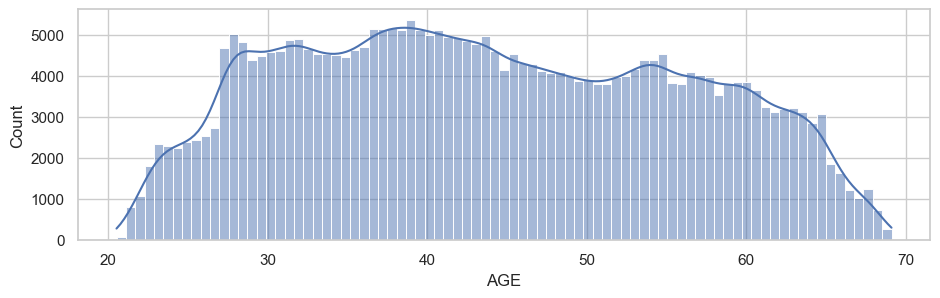

In [33]:
plt.figure(figsize=(11,3))
ax = sns.histplot(application_data , x = 'AGE', kde=True)

<Axes: xlabel='AGE'>

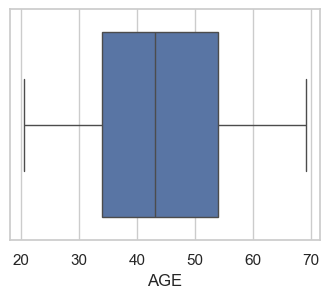

In [34]:
sns.boxplot(application_data , x = 'AGE')

Age of clients applying for loans is between 20 and 70 years.

What is the distribution of the total income of the clients 'AMT_INCOME_TOTAL'?

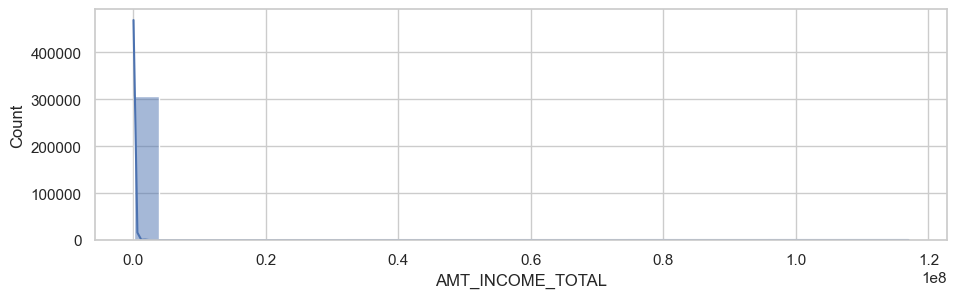

In [35]:
plt.figure(figsize=(11,3))
ax = sns.histplot(application_data , x = 'AMT_INCOME_TOTAL', kde=True, bins = 30)

It is heighly skewed to the right, we need to drop the outliers to properly see the distribution

In [36]:
application_data['AMT_INCOME_TOTAL'].describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [37]:
Q1 = application_data['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = application_data['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Create a mask to filter outliers
mask = ~((application_data['AMT_INCOME_TOTAL'] < (Q1 - 1.5 * IQR)) | (application_data['AMT_INCOME_TOTAL'] > (Q3 + 1.5 * IQR)))

# Apply the mask to create a new DataFrame without outliers
df_filtered = application_data[mask].copy()

In [38]:
df_filtered['AMT_INCOME_TOTAL'].describe()

count    293472.000000
mean     154263.493174
std       64015.070479
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      202500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [39]:
# Find the number of records dropped
records_dropped = len(application_data) - len(df_filtered)

print(f"Number of records dropped: {records_dropped}")

Number of records dropped: 14035


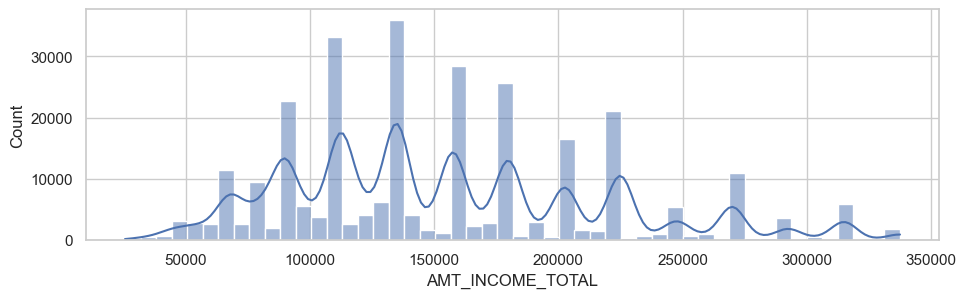

In [40]:
plt.figure(figsize=(11,3))
ax = sns.histplot(df_filtered , x = 'AMT_INCOME_TOTAL', kde=True, bins = 50)

Now what is the distribution of the Credit amount of the loan 'AMT_CREDIT'?

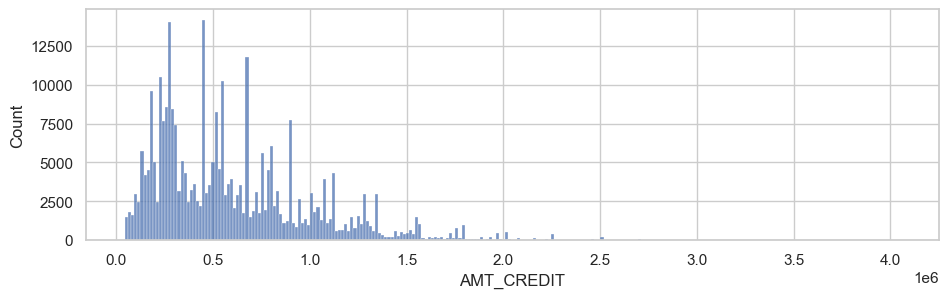

In [41]:
# amount of the loan
plt.figure(figsize=(11,3))
ax = sns.histplot(application_data,x = 'AMT_CREDIT')

In [42]:
df_filtered['AMT_CREDIT'].describe()

count    2.934720e+05
mean     5.797533e+05
std      3.844949e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.995000e+05
75%      7.908300e+05
max      3.860019e+06
Name: AMT_CREDIT, dtype: float64

The distribution of the loan amount is highly skewed to the right; the majority of loans are between 45,000 and 790,830.

What is the distribution of loan annuity 'AMT_ANNUITY'?

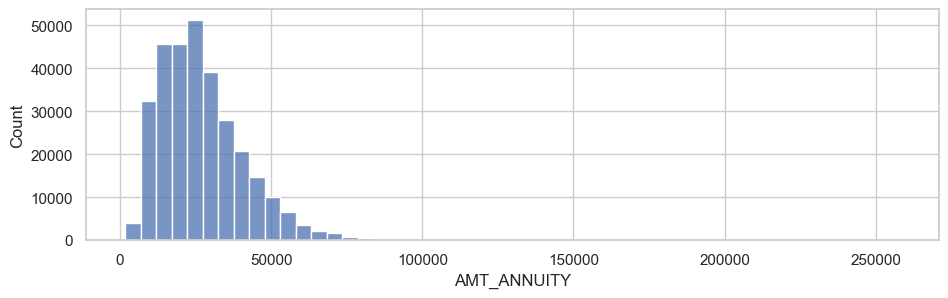

In [43]:
# amount paid per year
plt.figure(figsize=(11,3))
ax = sns.histplot(application_data,x = 'AMT_ANNUITY', bins = 50)

In [44]:
df_filtered['AMT_ANNUITY'].describe()

count    293460.000000
mean      26254.785141
std       13420.532292
min        1615.500000
25%       16231.500000
50%       24399.000000
75%       33363.000000
max      225000.000000
Name: AMT_ANNUITY, dtype: float64

The distribution is heighly skewed to the right, most of the values range between 10,000 and 34,0000

In [45]:
# CNT_CHILDREN
application_data['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215369
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
9          2
8          2
10         2
12         2
19         2
11         1
Name: count, dtype: int64

Since the number of clients with number of children greater than 3 is small for each category, let's combine them into one group(more than 3).

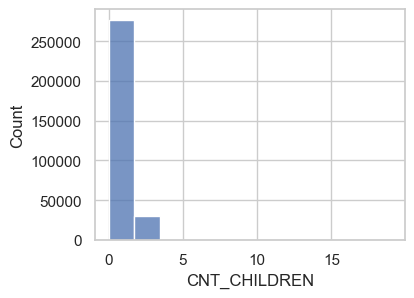

In [46]:
ax = sns.histplot(application_data, x = 'CNT_CHILDREN' , bins = 11)

In [47]:
application_data['CNT_CHILDREN_MAPPED'] = application_data['CNT_CHILDREN'].apply(lambda x: "More than 3" if x > 3 else x)

In [48]:
application_data['CNT_CHILDREN_MAPPED'].value_counts()

CNT_CHILDREN_MAPPED
0              215369
1               61118
2               26748
3                3717
More than 3       555
Name: count, dtype: int64

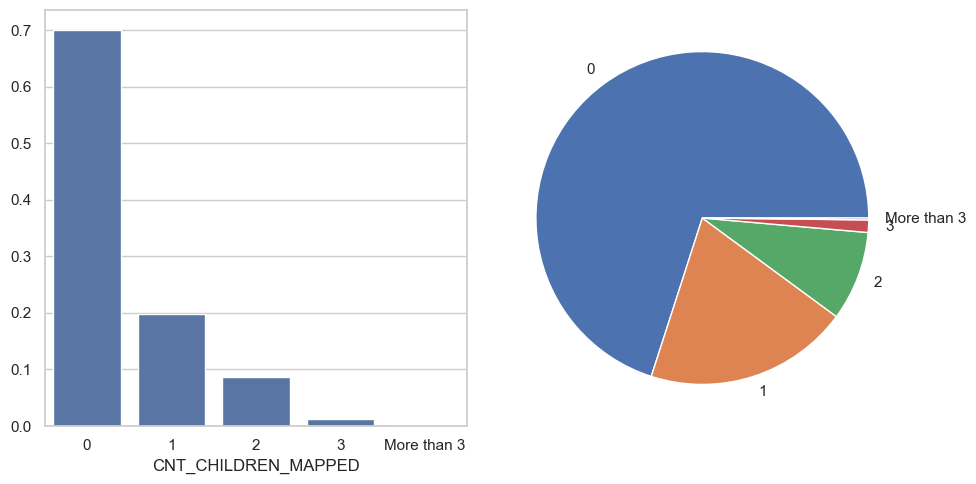

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(10,5))
normalized_counts = application_data['CNT_CHILDREN_MAPPED'].value_counts(normalize=True)
ax = sns.barplot(x = normalized_counts.index, y = normalized_counts.values, ax = ax1)
Gender_df = pd.DataFrame(application_data['CNT_CHILDREN_MAPPED'].value_counts())
ax2.pie(Gender_df['count'], labels=Gender_df.index)
ax2.set_aspect('equal')
plt.tight_layout()

In [50]:
missing_percent = (application_data.isnull().sum() / len(application_data)) * 100
missing_percent = missing_percent.sort_values(ascending=False)
print(missing_percent.head())

COMMONAREA_AVG              69.872231
COMMONAREA_MEDI             69.872231
COMMONAREA_MODE             69.872231
NONLIVINGAPARTMENTS_AVG     69.433216
NONLIVINGAPARTMENTS_MODE    69.433216
dtype: float64


In [51]:
# Identify columns to drop
missing_percent = (application_data.isnull().sum() / len(application_data)) * 100
cols_to_drop = missing_percent[missing_percent > 10].index

# Drop themS
application_data = application_data.drop(columns=cols_to_drop)

print(f'Dropped {len(cols_to_drop)} columns. Remaining columns: {application_data.shape[1]}')


Dropped 57 columns. Remaining columns: 68


In [52]:
missing_double_check = (application_data.isnull().sum() / len(application_data)) * 100
missing_double_check = missing_double_check.sort_values(ascending=False)
display(missing_double_check.head(20))

NAME_TYPE_SUITE             0.420153
DEF_60_CNT_SOCIAL_CIRCLE    0.332025
DEF_30_CNT_SOCIAL_CIRCLE    0.332025
OBS_60_CNT_SOCIAL_CIRCLE    0.332025
OBS_30_CNT_SOCIAL_CIRCLE    0.332025
EXT_SOURCE_2                0.214629
AMT_GOODS_PRICE             0.090404
AMT_ANNUITY                 0.003902
CNT_FAM_MEMBERS_MAPPED      0.000650
CNT_FAM_MEMBERS             0.000650
DAYS_LAST_PHONE_CHANGE      0.000325
SK_ID_CURR                  0.000000
CODE_GENDER                 0.000000
NAME_CONTRACT_TYPE          0.000000
TARGET                      0.000000
NAME_INCOME_TYPE            0.000000
AMT_INCOME_TOTAL            0.000000
CNT_CHILDREN                0.000000
FLAG_OWN_REALTY             0.000000
FLAG_OWN_CAR                0.000000
dtype: float64

# Application Dataset after removing columns with missing values > 10%

In [53]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CNT_FAM_MEMBERS_MAPPED,AGE,CNT_CHILDREN_MAPPED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,1.0,25.920548,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,2.0,45.931507,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,1.0,52.180822,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,2.0,52.068493,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,1.0,54.608219,0


In [54]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   AMT_ANNUITY                  307495 non-null  float64
 10  AMT_GOODS_PRICE              307229 non-null  float64
 11  NAME_TYPE_SUITE              306215 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13  NAME

## EDA on Previous application Dataset

In [55]:
print(previous_application.shape)
print(previous_application.columns.tolist()[:])  # Preview first 10 column names
previous_application.head()

(1670214, 37)
['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [57]:
previous_application.isnull().sum().sort_values(ascending=False)  # Null check

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
NFLAG_INSURED_ON_APPROVAL       673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_PREV                           0
AMT_APPLICATION                      0
NAME_CONTRACT_TYPE                   0
SK_ID_CURR                           0
WEEKDAY_APPR_PROCESS_START           0
CODE_REJECT_REASON                   0
NAME_PAYMENT_TYPE                    0
DAYS_DECISION                        0
NAME_CONTRACT_STATUS                 0
NAME_CASH_LOAN_PURPOSE   

In [58]:
previous_application.duplicated().sum() #Duplicate values

np.int64(0)

In [59]:
missing_percent = (previous_application.isnull().sum() / len(previous_application)) * 100
missing_percent = missing_percent.sort_values(ascending=False)
print(missing_percent.head())

RATE_INTEREST_PRIVILEGED    99.643698
RATE_INTEREST_PRIMARY       99.643698
AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
NAME_TYPE_SUITE             49.119754
dtype: float64


In [60]:
# Identify columns to drop
missing_percent = (previous_application.isnull().sum() / len(previous_application)) * 100
cols_to_drop = missing_percent[missing_percent > 10].index

# Drop themS
previous_application = previous_application.drop(columns=cols_to_drop)

print(f'Dropped {len(cols_to_drop)} columns. Remaining columns: {previous_application.shape[1]}')


Dropped 14 columns. Remaining columns: 23


In [61]:
missing_double_check = (previous_application.isnull().sum() / len(previous_application)) * 100
missing_double_check = missing_double_check.sort_values(ascending=False)
display(missing_double_check.head(23))

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_APPLICATION                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
SK_ID_PREV                     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
NAME_YIELD_GROUP               0.000000
dtype: float64

# Previous_Application Dataset after removing columns with missing values > 10%

In [62]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [63]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

# Let us answer few question about the data

# Q1. Proportion of defaulters vs non-defaulters


Q1. Class distribution:
TARGET
0    0.91927
1    0.08073
Name: proportion, dtype: float64


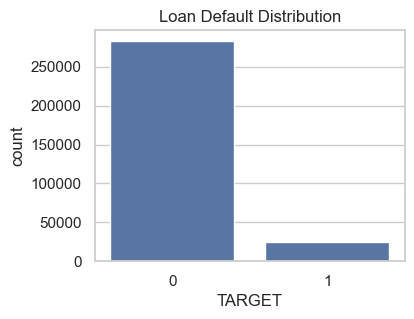

In [68]:
print("\nQ1. Class distribution:")
print(application_data['TARGET'].value_counts(normalize=True))
sns.countplot(x='TARGET', data=application_data)
plt.title("Loan Default Distribution")
plt.show()

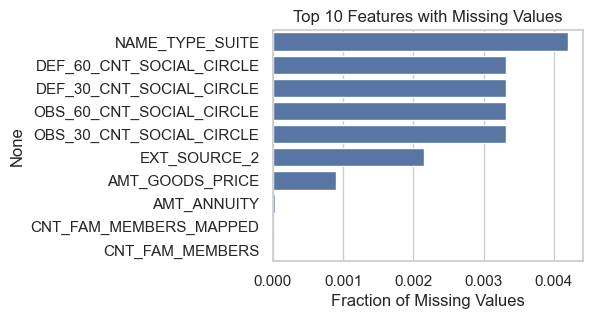

In [71]:
missing = application_data.isnull().mean().sort_values(ascending=False).head(10)
sns.barplot(x=missing.values, y=missing.index)
plt.title('Top 10 Features with Missing Values')
plt.xlabel('Fraction of Missing Values')
plt.show()


# Q3. Income levels vs TARGET


Q3. Income vs Default:


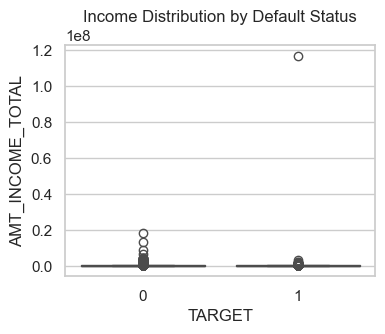

In [72]:
print("\nQ3. Income vs Default:")
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=application_data)
plt.title("Income Distribution by Default Status")
plt.show()

# Q4. Education & Family status vs TARGET

In [73]:
print("\nQ4. Default rate by Education:")
print(application_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean())


Q4. Default rate by Education:
NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053552
Incomplete higher                0.084858
Lower secondary                  0.109277
Secondary / secondary special    0.089400
Name: TARGET, dtype: float64


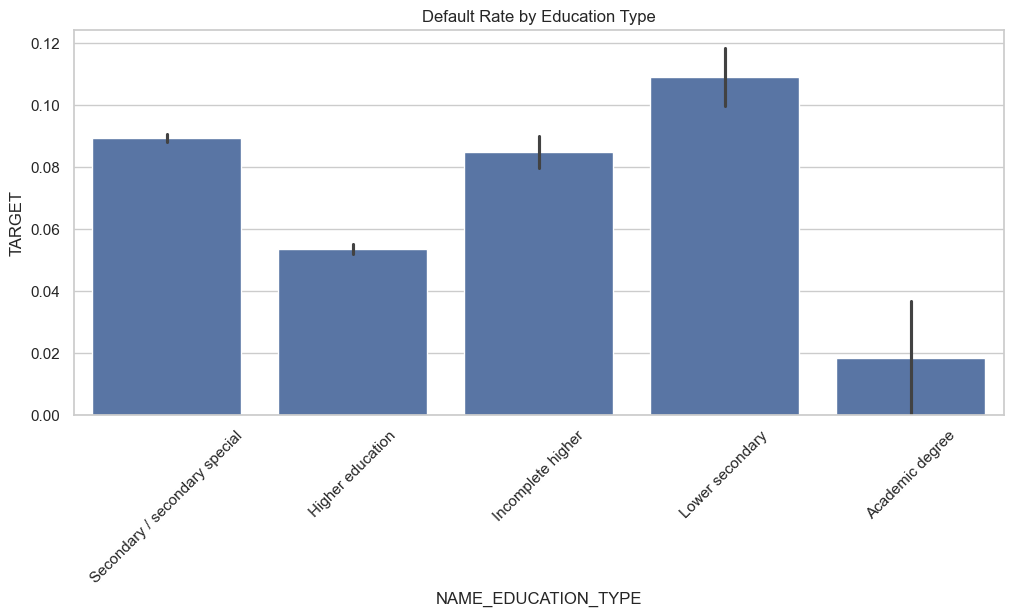

In [74]:
plt.figure(figsize=(12, 5))
sns.barplot(data=application_data, x='NAME_EDUCATION_TYPE', y='TARGET')
plt.title('Default Rate by Education Type')
plt.xticks(rotation=45)
plt.show()

In [75]:
print("\nDefault rate by Family Status:")
print(application_data.groupby('NAME_FAMILY_STATUS')['TARGET'].mean())


Default rate by Family Status:
NAME_FAMILY_STATUS
Civil marriage          0.099449
Married                 0.075600
Separated               0.081942
Single / not married    0.098077
Unknown                 0.000000
Widow                   0.058242
Name: TARGET, dtype: float64


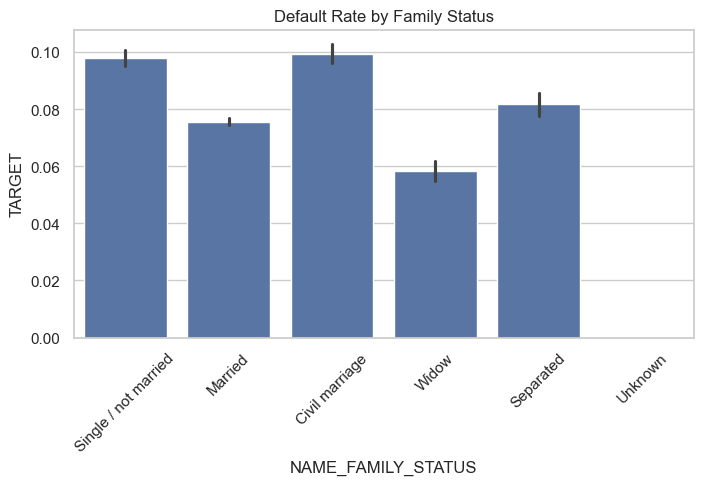

In [76]:
plt.figure(figsize=(8, 4))
sns.barplot(data=application_data, x='NAME_FAMILY_STATUS', y='TARGET')
plt.title('Default Rate by Family Status')
plt.xticks(rotation=45)
plt.show()

# Q5. Age vs Default

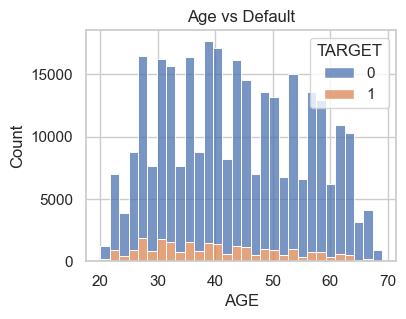

In [77]:
application_data['AGE'] = (-application_data['DAYS_BIRTH']) // 365
sns.histplot(data=application_data, x='AGE', hue='TARGET', multiple='stack', bins=30)
plt.title("Age vs Default")
plt.show()

# Q6. Correlation

In [78]:
print("\nQ6. Top 10 correlated features with TARGET:")

# Select only numeric columns
numeric_df = application_data.select_dtypes(include=['number'])

# Drop rows with missing target values (if any)
numeric_df = numeric_df.dropna(subset=['TARGET'])

# Compute correlations only among numeric columns
correlations = numeric_df.corr()['TARGET'].abs().sort_values(ascending=False)
print(correlations[1:11])  # Exclude TARGET itself



Q6. Top 10 correlated features with TARGET:
EXT_SOURCE_2                   0.160471
DAYS_BIRTH                     0.078242
AGE                            0.078237
REGION_RATING_CLIENT_W_CITY    0.060895
REGION_RATING_CLIENT           0.058901
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050992
FLAG_EMP_PHONE                 0.045984
DAYS_EMPLOYED                  0.044934
Name: TARGET, dtype: float64


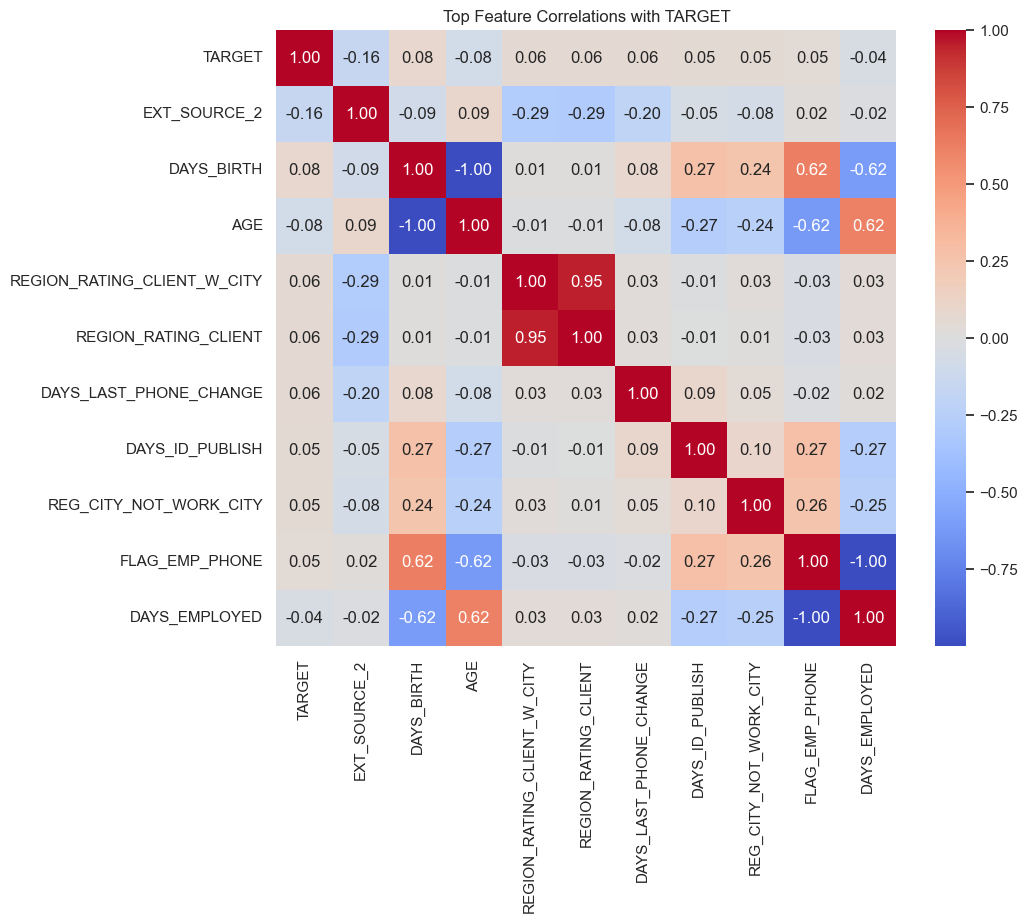

In [80]:
numeric_df = application_data.select_dtypes(include=['number']).dropna(subset=['TARGET'])
corr_matrix = numeric_df.corr()
top_corr = corr_matrix['TARGET'].abs().sort_values(ascending=False)[1:11].index.tolist()
top_corr = ['TARGET'] + top_corr

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_corr, top_corr], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Top Feature Correlations with TARGET')
plt.show()


# Q7. Employment anomalies

In [81]:
print("\nQ7. Check for 365243 days in DAYS_EMPLOYED:")
print((application_data['DAYS_EMPLOYED'] == 365243).sum())


Q7. Check for 365243 days in DAYS_EMPLOYED:
55374


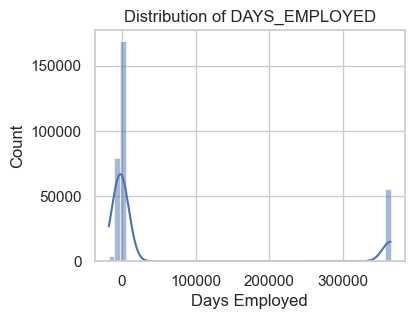

In [82]:
sns.histplot(application_data['DAYS_EMPLOYED'], bins=50, kde=True)
plt.title('Distribution of DAYS_EMPLOYED')
plt.xlabel('Days Employed')
plt.show()


# Q8. Region mismatch features

In [83]:
print("\nQ8. Region mismatch default rates:")
region_flags = ['LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION']
for flag in region_flags:
    if flag in application_data.columns:
        print(f"{flag} default rate:")
        print(application_data.groupby(flag)['TARGET'].mean())


Q8. Region mismatch default rates:
LIVE_REGION_NOT_WORK_REGION default rate:
LIVE_REGION_NOT_WORK_REGION
0    0.080572
1    0.084460
Name: TARGET, dtype: float64
REG_REGION_NOT_WORK_REGION default rate:
REG_REGION_NOT_WORK_REGION
0    0.080293
1    0.088906
Name: TARGET, dtype: float64


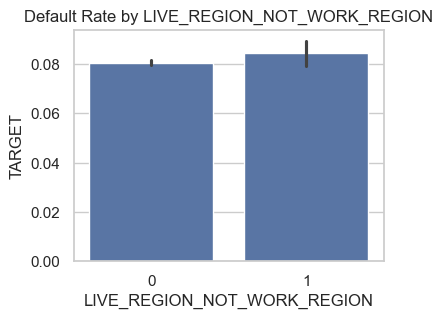

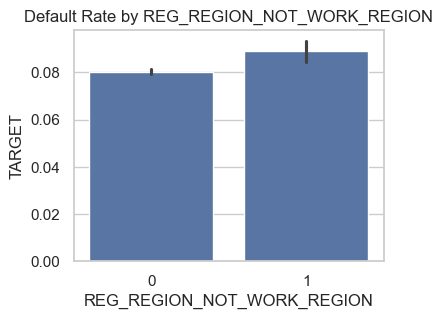

In [84]:
for flag in ['LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION']:
    if flag in application_data.columns:
        sns.barplot(data=application_data, x=flag, y='TARGET')
        plt.title(f'Default Rate by {flag}')
        plt.show()


# Q9. Social Circle Influence

In [85]:
print("\nQ9. Social circle default count vs personal default rate:")
if 'DEF_30_CNT_SOCIAL_CIRCLE' in application_data.columns:
    display(application_data[['DEF_30_CNT_SOCIAL_CIRCLE', 'TARGET']].dropna().corr())


Q9. Social circle default count vs personal default rate:


,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
DEF_30_CNT_SOCIAL_CIRCLE,1.000000,0.032261
TARGET,0.032261,1.000000


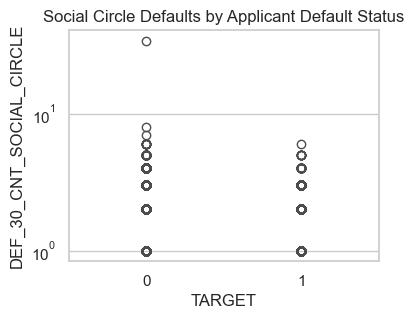

In [86]:
sns.boxplot(data=application_data, x='TARGET', y='DEF_30_CNT_SOCIAL_CIRCLE')
plt.yscale('log')
plt.title('Social Circle Defaults by Applicant Default Status')
plt.show()


In [87]:
mean_social = application_data.groupby('TARGET')['DEF_30_CNT_SOCIAL_CIRCLE'].mean()
print(mean_social)


TARGET
0    0.139132
1    0.191980
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


# Q10. Previous loan rejections vs default


Q10. Previous loan rejections vs default rate:
REFUSED_COUNT_BIN
(-1, 0]    0.069845
(0, 1]     0.088346
(1, 2]     0.102379
(2, 5]     0.117884
(5, 10]    0.144459
Name: TARGET, dtype: float64


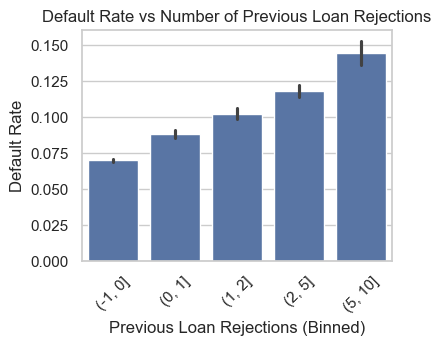

In [88]:
print("\nQ10. Previous loan rejections vs default rate:")

# Step 1: Count previous rejections
prev_refused = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused']
refused_counts = prev_refused.groupby('SK_ID_CURR').size().reset_index(name='REFUSED_COUNT')

# Step 2: Merge and ensure numeric type before fillna
merged = application_data.merge(refused_counts, on='SK_ID_CURR', how='left')
merged['REFUSED_COUNT'] = pd.to_numeric(merged['REFUSED_COUNT'], errors='coerce').fillna(0).astype(int)

# Step 3: Bin the counts
merged['REFUSED_COUNT_BIN'] = pd.cut(merged['REFUSED_COUNT'], bins=[-1, 0, 1, 2, 5, 10], right=True)

# Step 4: Print default rate by bin
print(merged.groupby('REFUSED_COUNT_BIN')['TARGET'].mean())

# Step 5: Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=merged, x='REFUSED_COUNT_BIN', y='TARGET')
plt.title('Default Rate vs Number of Previous Loan Rejections')
plt.xticks(rotation=45)
plt.ylabel('Default Rate')
plt.xlabel('Previous Loan Rejections (Binned)')
plt.show()

# Q11. Income threshold

In [89]:
print("\nQ11. Default rate by income bins:")
application_data['INCOME_BIN'] = pd.qcut(application_data['AMT_INCOME_TOTAL'], q=5)
print(application_data.groupby('INCOME_BIN')['TARGET'].mean())


Q11. Default rate by income bins:
INCOME_BIN
(25649.999, 99000.0]       0.082062
(99000.0, 135000.0]        0.085884
(135000.0, 162000.0]       0.086850
(162000.0, 225000.0]       0.080570
(225000.0, 117000000.0]    0.065199
Name: TARGET, dtype: float64


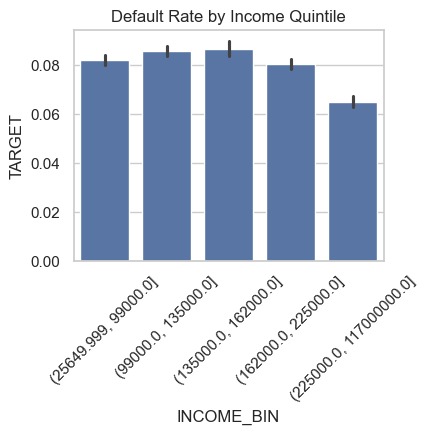

In [90]:
application_data['INCOME_BIN'] = pd.qcut(application_data['AMT_INCOME_TOTAL'], 5)
sns.barplot(data=application_data, x='INCOME_BIN', y='TARGET')
plt.title('Default Rate by Income Quintile')
plt.xticks(rotation=45)
plt.show()


# Q12. Combination of children & education

In [91]:
print("\nQ12. Default rate by Children + Education:")
display(application_data.groupby(['CNT_CHILDREN', 'NAME_EDUCATION_TYPE'])['TARGET'].mean().unstack().fillna(0))


Q12. Default rate by Children + Education:


NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
CNT_CHILDREN,,,,,
0,0.008264,0.053959,0.085366,0.095074,0.083846
1,0.068966,0.055124,0.086294,0.156194,0.102725
2,0.000000,0.047915,0.081169,0.143357,0.102270
3,0.000000,0.046683,0.045455,0.196429,0.110627
4,0.000000,0.028571,0.100000,0.181818,0.147929
5,0.000000,0.000000,0.000000,0.000000,0.098592
6,0.000000,0.250000,0.000000,0.000000,0.333333
7,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000


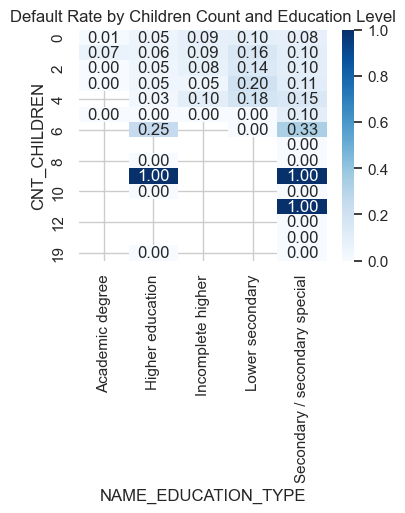

In [92]:
pivot = application_data.pivot_table(values='TARGET', index='CNT_CHILDREN', columns='NAME_EDUCATION_TYPE')
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='Blues')
plt.title('Default Rate by Children Count and Education Level')
plt.show()


In [96]:
numeric_df = application_data.select_dtypes(include=['number']).drop(columns=['TARGET'])
corr_matrix = numeric_df.corr().abs()  # absolute correlation values
corr_matrix

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE
SK_ID_CURR,1.000000,0.001120,0.001821,0.000350,0.000440,0.000241,0.000852,0.001500,0.001361,0.000973,...,0.000896,0.001078,0.002603,0.000725,0.001450,0.000508,0.000167,0.001072,0.000282,0.001467
CNT_CHILDREN,0.001120,1.000000,0.012884,0.002151,0.021381,0.001818,0.025577,0.330937,0.239818,0.183387,...,0.003945,0.005459,0.003609,0.010663,0.000773,0.004031,0.000864,0.000988,0.002450,0.330893
AMT_INCOME_TOTAL,0.001821,0.012884,1.000000,0.156871,0.191658,0.159610,0.074795,0.027261,0.064223,0.027807,...,0.022747,0.020708,0.010793,0.007269,0.002230,0.003130,0.002408,0.000242,0.000589,0.027225
AMT_CREDIT,0.000350,0.002151,0.156871,1.000000,0.770137,0.986971,0.099742,0.055434,0.066842,0.009623,...,0.052429,0.048828,0.032252,0.061925,0.011743,0.034329,0.021081,0.031023,0.016148,0.055406
AMT_ANNUITY,0.000440,0.021381,0.191658,0.770137,1.000000,0.775110,0.118433,0.009447,0.104335,0.038517,...,0.025115,0.036856,0.016125,0.007197,0.003191,0.009745,0.004573,0.011718,0.017598,0.009457
AMT_GOODS_PRICE,0.000241,0.001818,0.159610,0.986971,0.775110,1.000000,0.103521,0.053444,0.064844,0.011568,...,0.052357,0.048749,0.032932,0.058305,0.012139,0.032748,0.020279,0.031640,0.014486,0.053419
REGION_POPULATION_RELATIVE,0.000852,0.025577,0.074795,0.099742,0.118433,0.103521,1.000000,0.029593,0.003976,0.053827,...,0.031186,0.032202,0.009447,0.006314,0.007414,0.013368,0.002364,0.000045,0.003437,0.029659
DAYS_BIRTH,0.001500,0.330937,0.027261,0.055434,0.009447,0.053444,0.029593,1.000000,0.615867,0.331905,...,0.026333,0.030734,0.012953,0.024045,0.007877,0.044499,0.003614,0.009015,0.027282,0.999711
DAYS_EMPLOYED,0.001361,0.239818,0.064223,0.066842,0.104335,0.064844,0.003976,0.615867,1.000000,0.210242,...,0.025779,0.023384,0.014286,0.042906,0.007188,0.040396,0.010040,0.010136,0.008396,0.615810
DAYS_REGISTRATION,0.000973,0.183387,0.027807,0.009623,0.038517,0.011568,0.053827,0.331905,0.210242,1.000000,...,0.015470,0.011636,0.008195,0.025935,0.002102,0.017041,0.004764,0.006971,0.003859,0.331789


In [97]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > 0.85)
]

In [99]:
application_data = application_data.drop(columns=high_corr_features)
print(f"Removed {len(high_corr_features)} highly correlated features:")
print(high_corr_features)

Removed 8 highly correlated features:
['AMT_GOODS_PRICE', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AGE']


In [100]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307507 non-null  int64   
 1   TARGET                      307507 non-null  int64   
 2   NAME_CONTRACT_TYPE          307507 non-null  object  
 3   CODE_GENDER                 307507 non-null  object  
 4   FLAG_OWN_CAR                307507 non-null  object  
 5   FLAG_OWN_REALTY             307507 non-null  object  
 6   CNT_CHILDREN                307507 non-null  int64   
 7   AMT_INCOME_TOTAL            307507 non-null  float64 
 8   AMT_CREDIT                  307507 non-null  float64 
 9   AMT_ANNUITY                 307495 non-null  float64 
 10  NAME_TYPE_SUITE             306215 non-null  object  
 11  NAME_INCOME_TYPE            307507 non-null  object  
 12  NAME_EDUCATION_TYPE         307507 non-null  object  
 13  NAME

#  2. Train-Test Split (Stratified)

In [101]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Separate features and target
X = application_data.drop(columns=['SK_ID_CURR', 'TARGET'])
y = application_data['TARGET']

# Step 2: Define numeric and categorical features again
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
binary_like_cols = [col for col in numeric_features if X[col].nunique() <= 2]
numeric_features = list(set(numeric_features) - set(binary_like_cols))
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
categorical_features += binary_like_cols

X = application_data.drop(columns=['SK_ID_CURR', 'TARGET'])
y = application_data['TARGET']

# Step 3: Convert categorical columns to strings
X[categorical_features] = X[categorical_features].astype(str)  # Ensure consistency

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Multicollinearity Check & VIF Reduction

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Handle missing values
X_train_num = X_train[numeric_features].copy().fillna(X_train[numeric_features].median())

# Standardize
X_train_scaled = StandardScaler().fit_transform(X_train_num)

# Compute VIF
vif_df = pd.DataFrame({
    "Feature": X_train_num.columns,
    "VIF": [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
})

# Drop features with VIF > 10
high_vif_cols = vif_df[vif_df["VIF"] > 10]["Feature"].tolist()
X_train.drop(columns=high_vif_cols, inplace=True)
X_test.drop(columns=high_vif_cols, inplace=True)
numeric_features = list(set(numeric_features) - set(high_vif_cols))


#  4. Preprocessing Pipeline + PCA

In [107]:
from sklearn.decomposition import PCA

# Reduce dimensionality post-scaling
pca = PCA(n_components=0.95)  # Retain 95% variance

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("pca", pca)
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])


# 5. Fit Preprocessor

In [108]:
# Step 6: Fit on training data and transform both sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [113]:
print(f"Shape after preprocessing (train): {X_train_processed.shape}")
print(f"Shape after preprocessing (test): {X_test_processed.shape}")
# print(f"PCA components used (numeric only): {pca.n_components_}")


# Access the PCA step inside the numeric pipeline
pca_model = preprocessor.named_transformers_['num'].named_steps['pca']

# Now get the number of components
print(f"PCA components used (numeric only): {pca_model.n_components_}")
print(f"Explained variance per component: {pca_model.explained_variance_ratio_}")


Shape after preprocessing (train): (246005, 190)
Shape after preprocessing (test): (61502, 190)
PCA components used (numeric only): 13
Explained variance per component: [0.14706961 0.1429835  0.102911   0.08886668 0.07497781 0.06625042
 0.0622339  0.05679367 0.05420444 0.0492008  0.04428704 0.04271661
 0.02939864]


# 6. Algorithm Selection & Hyperparameter Tuning
- LogisticRegression
- RandomForestClassifier
- XGBClassifier
- GradientBoostingClassifier
- SVC
## Model 1: LogisticRegression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.69, 0.222],  # Regularization strength (inverse)
    'penalty': ['l2'],                   # You can add 'l1' if using solver='liblinear'
    'solver': ['lbfgs'],                 # 'lbfgs' works well with PCA
    'class_weight': [None, 'balanced']
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_processed, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.69,
                               0.222],
                         'class_weight': [None, 'balanced'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=2)

In [130]:
best_log_reg = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

y_pred = best_log_reg.predict(X_test_processed)
y_proba = best_log_reg.predict_proba(X_test_processed)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Best Hyperparameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.67      0.78     56537
           1       0.14      0.63      0.23      4965

    accuracy                           0.66     61502
   macro avg       0.55      0.65      0.51     61502
weighted avg       0.89      0.66      0.74     61502

Confusion Matrix:
[[37670 18867]
 [ 1827  3138]]
ROC AUC Score: 0.7035403973346439


## Visualizing the Logistic Regression Results

In [131]:
# !pip install yellowbrick # install once 

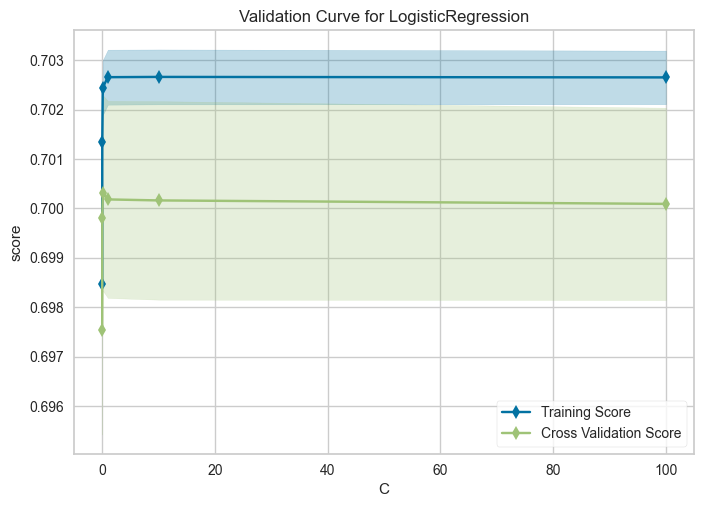

<Axes: title={'center': 'Validation Curve for LogisticRegression'}, xlabel='C', ylabel='score'>

In [132]:
from yellowbrick.model_selection import ValidationCurve
import numpy as np

# Re-initialize the base model
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Create validation curve visualizer
viz = ValidationCurve(
    model,
    param_name="C",
    param_range=np.logspace(-3, 2, 6),
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

# Fit on the preprocessed training set
viz.fit(X_train_processed, y_train)
viz.show()


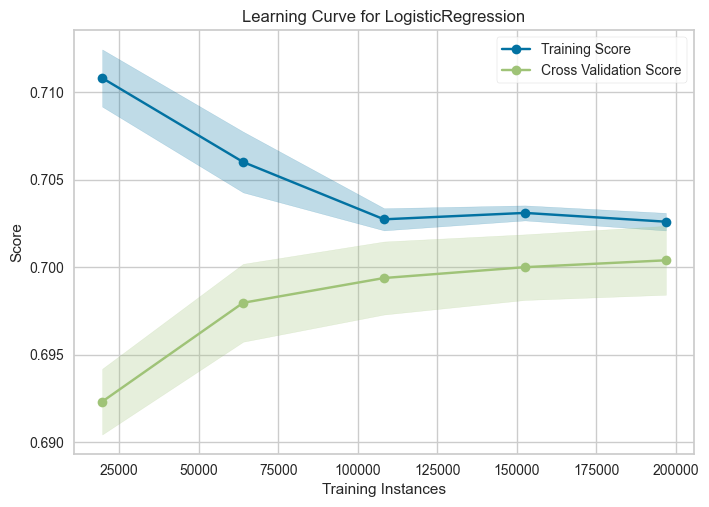

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [133]:
from yellowbrick.model_selection import LearningCurve

# Use best model or define again
model = LogisticRegression(C=grid_search.best_params_['C'],
                           solver='lbfgs',
                           class_weight=grid_search.best_params_['class_weight'],
                           max_iter=1000,
                           random_state=42)

viz = LearningCurve(model, scoring='roc_auc', train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=-1)
viz.fit(X_train_processed, y_train)
viz.show()


## Model 2: XGBoost

In [121]:
# !pip install xgboost    #Run it once then comment it out

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.25, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    tree_method='hist',  # Use 'gpu_hist' if using GPU
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=25,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_processed, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrai...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.25, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [126]:
best_xgb = random_search.best_estimator_

# Predict on test data
y_pred = best_xgb.predict(X_test_processed)
y_proba = best_xgb.predict_proba(X_test_processed)[:, 1]

# Evaluation
print("Best Parameters:", random_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Best Parameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56537
           1       0.57      0.00      0.00      4965

    accuracy                           0.92     61502
   macro avg       0.75      0.50      0.48     61502
weighted avg       0.89      0.92      0.88     61502

Confusion Matrix:
 [[56534     3]
 [ 4961     4]]
ROC AUC Score: 0.7091591099669492


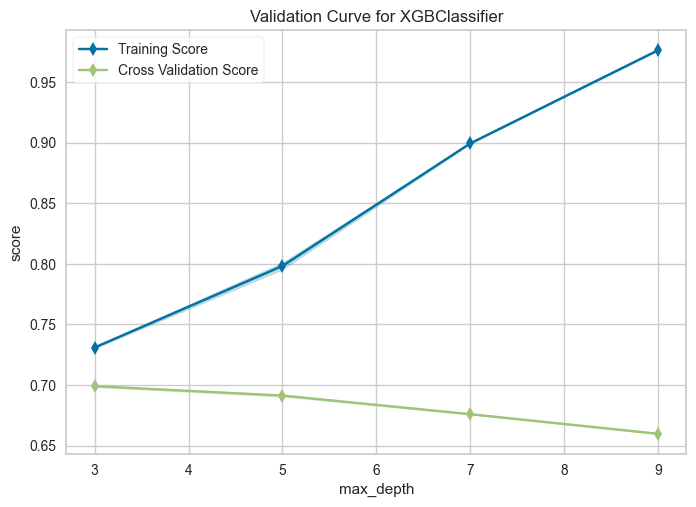

<Axes: title={'center': 'Validation Curve for XGBClassifier'}, xlabel='max_depth', ylabel='score'>

In [127]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    xgb.XGBClassifier(eval_metric='auc', use_label_encoder=False),
    param_name="max_depth",
    param_range=[3, 5, 7, 9],
    scoring="roc_auc",
    cv=3,
    n_jobs=-1
)
viz.fit(X_train_processed, y_train)
viz.show()


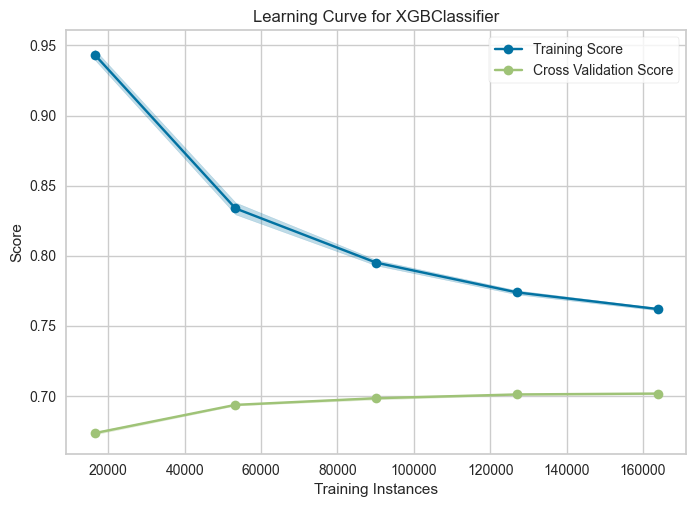

<Axes: title={'center': 'Learning Curve for XGBClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [128]:
from yellowbrick.model_selection import LearningCurve

viz = LearningCurve(best_xgb, scoring='roc_auc', train_sizes=np.linspace(0.1, 1.0, 5), cv=3, n_jobs=-1)
viz.fit(X_train_processed, y_train)
viz.show()


## Model 3: RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf_clf = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=25,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train_processed, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [ ]:
best_rf_model = random_search_rf.best_estimator_

# Predictions
y_pred_rf = best_rf_model.predict(X_test_processed)
y_proba_rf = best_rf_model.predict_proba(X_test_processed)[:, 1]

# Evaluation
print("Best Parameters:", random_search_rf.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

In [ ]:
from yellowbrick.model_selection import ValidationCurve

viz_rf_val = ValidationCurve(
    RandomForestClassifier(random_state=42),
    param_name="max_depth",
    param_range=[5, 10, 20, 30, 50],
    scoring="roc_auc",
    cv=3,
    n_jobs=-1
)

viz_rf_val.fit(X_train_processed, y_train)
viz_rf_val.show()


In [ ]:
from yellowbrick.model_selection import LearningCurve

viz_rf_learn = LearningCurve(
    best_rf_model,
    scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,
    n_jobs=-1
)

viz_rf_learn.fit(X_train_processed, y_train)
viz_rf_learn.show()


## Model 4: GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

param_dist_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

gb_model = GradientBoostingClassifier(random_state=42)

random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist_gb,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_gb.fit(X_train_processed, y_train)


In [ ]:
best_gb = random_search_gb.best_estimator_

y_pred_gb = best_gb.predict(X_test_processed)
y_proba_gb = best_gb.predict_proba(X_test_processed)[:, 1]

print("Best Parameters:", random_search_gb.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_gb))


In [ ]:
from yellowbrick.model_selection import ValidationCurve

viz_gb_val = ValidationCurve(
    GradientBoostingClassifier(random_state=42),
    param_name="max_depth",
    param_range=[3, 5, 7],
    scoring="roc_auc",
    cv=3,
    n_jobs=-1
)

viz_gb_val.fit(X_train_processed, y_train)
viz_gb_val.show()


In [ ]:
from yellowbrick.model_selection import LearningCurve

viz_gb_learn = LearningCurve(
    best_gb,
    scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,
    n_jobs=-1
)

viz_gb_learn.fit(X_train_processed, y_train)
viz_gb_learn.show()


## Model 5. SupportVectorClassifier

In [ ]:
from sklearn.svm import SVC

param_dist_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

svc_model = SVC(probability=True, random_state=42)

random_search_svc = RandomizedSearchCV(
    estimator=svc_model,
    param_distributions=param_dist_svc,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_svc.fit(X_train_processed, y_train)


In [ ]:
best_svc = random_search_svc.best_estimator_

y_pred_svc = best_svc.predict(X_test_processed)
y_proba_svc = best_svc.predict_proba(X_test_processed)[:, 1]

print("Best Parameters:", random_search_svc.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_svc))


In [ ]:
best_svc = random_search_svc.best_estimator_

y_pred_svc = best_svc.predict(X_test_processed)
y_proba_svc = best_svc.predict_proba(X_test_processed)[:, 1]

print("Best Parameters:", random_search_svc.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_svc))


In [ ]:
viz_svc_val = ValidationCurve(
    SVC(probability=True, random_state=42),
    param_name="C",
    param_range=[0.1, 1, 10],
    scoring="roc_auc",
    cv=3,
    n_jobs=-1
)

viz_svc_val.fit(X_train_processed, y_train)
viz_svc_val.show()


##  High-Level Architecture:
              
              Input Features
                    |
     -------------------------------------
     |       |       |       |        |
     XGB     RF     SVC     GB     LogisticRegression
     |        |       |       |         |
     -------------------------------------
                    |
         Logistic Regression (meta-learner)


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('xgb', best_xgb),
    ('rf', best_rf_model),
    ('svc', best_svc),
    ('gb', best_gb),
    ('logreg', best_log_reg)
]

# Meta-learner: Logistic Regression
meta_learner = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1,
    passthrough=True  # allows original features to be seen by meta-model
)

stacked_model.fit(X_train_processed, y_train)

In [ ]:
# Predictions
y_pred_stack = stacked_model.predict(X_test_processed)
y_proba_stack = stacked_model.predict_proba(X_test_processed)[:, 1]

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_stack))

In [ ]:
import joblib
joblib.dump(stacked_model, "final_stacked_model.pkl")
